#TASK #1: UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM) 

![alt text](https://drive.google.com/uc?id=1rGljEUj4EEwo4Y9vzuXjM2le_tGC1NFy)

![alt text](https://drive.google.com/uc?id=1BYrA8caoVBNS0ZZusSas0u5y_o8N4c3f)

![alt text](https://drive.google.com/uc?id=1M5TERDwqNNTbV1a-_fLKWvdGcxHqNdKF)

![alt text](https://drive.google.com/uc?id=1KLHifTx79y-e2xrNPSZ-wY2tCrZEzVZC)

![alt text](https://drive.google.com/uc?id=1LIM_wMcQjcOh-4U3h_NXYM6fIborwJTp)

![alt text](https://drive.google.com/uc?id=1j8HYfvy6Gn0v3a8z5cnuL4p-CvcVa8Va)

![alt text](https://drive.google.com/uc?id=1_9Tw_D0MRDnbZ7huDDfnJbbhHZVhFvPb)

# TASK #2: IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [1]:
# Environment preparation
import sys
!pip install expectexception

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Preparing environment
import expectexception

# %%expect_exception TypeError

In [3]:
!ls sample_data/

anscombe.json		      mnist_test.csv	     stocks.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

from pandas.core.dtypes.api import is_numeric_dtype

In [6]:
# Read the stock data file
stocks_df = pd.read_csv('sample_data/stocks.csv')
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [7]:
# Sort the data based on Date
stocks_df.sort_values(by = ['Date'], inplace=True)
stocks_df.set_index('Date', inplace=True)
stocks_df

AAPL          BA          T        MGM         AMZN  \
Date                                                                    
2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...                ...         ...        ...        ...          ...   
2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

                   IBM         TSLA         GOOG        sp500  
Date                                                           
2012-01-12  180.550003    28.250000   313.644379  1295.500000  
2012-01-13  179.160004    22.790001   311.328064  1289.089966  
2012-01-17  180.000000    26.600000   313.116364  1293.670044  
2012-01-18  181.070007    26.809999   315.273285  1308.040039  
2012-01-19  180.520004    26.760000   318.590851  1314.500000  
...                ...          ...          ...          ...  
2020-08-05  125.449997  1485.020020  1473.609985  3327.770020  
2020-08-06  126.120003  1489.579956  1500.099976  3349.159912  
2020-08-07  124.959999  1452.709961  1494.489990  3351.280029  
2020-08-10  127.110001  1418.569946  1496.099976  3360.469971  
2020-08-11  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 9 columns]

In [8]:
# Function to normalize the prices based on the initial price
def normalize(df):
  return df.apply(lambda col: col/col[0] if is_numeric_dtype(col) else col)

**MINI CHALLENGE #1:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data** 
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck** 

In [9]:
#Create a function to plot stocks data in an interactive way using Plotly Express
def interactive_plot(df, title):
  fig = px.line(df, title = title)
  fig.update_layout(legend_title_text = 'Portfolio')
  fig.show()

In [10]:
# Call the function and visualize the stocks data
interactive_plot(stocks_df, 'Portfolio Price History')

In [11]:
# Call the function visualize normalized stocks data
interactive_plot(normalize(stocks_df), title='Normalized Portfolio Price History')

# TASK #3: CALCULATE DAILY RETURNS

In [12]:
# Function to calculate the daily returns 
def daily_returns(df):
  return df.pct_change().fillna(0) * 100

In [13]:
# Get the daily returns 
stocks_daily_return = daily_returns(stocks_df)
stocks_daily_return

AAPL        BA         T        MGM      AMZN       IBM  \
Date                                                                      
2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...              ...       ...       ...        ...       ...       ...   
2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

                 TSLA      GOOG     sp500  
Date                                       
2012-01-12   0.000000  0.000000  0.000000  
2012-01-13 -19.327430 -0.738516 -0.494792  
2012-01-17  16.717854  0.574410  0.355295  
2012-01-18   0.789470  0.688856  1.110793  
2012-01-19  -0.186494  1.052283  0.493866  
...               ...       ...       ...  
2020-08-05  -0.133153  0.589774  0.642974  
2020-08-06   0.307062  1.797626  0.642770  
2020-08-07  -2.475194 -0.373974  0.063303  
2020-08-10  -2.350092  0.107728  0.274222  
2020-08-11  -3.114399 -1.054744 -0.796913  

[2159 rows x 9 columns]

**MINI CHALLENGE #2:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [14]:
stocks_daily_return.mean().sort_values(ascending=False)

TSLA     0.238398
AMZN     0.151122
AAPL     0.107695
GOOG     0.084392
BA       0.065907
MGM      0.064662
sp500    0.049316
T        0.008159
IBM     -0.006091
dtype: float64

In [15]:
stocks_daily_return[['AMZN', 'GOOG']].mean().idxmax()

'AMZN'

# TASK #4: CALCULATE BETA FOR A SINGLE STOCK

In [16]:
# Select any stock, let's say Apple 
stocks_daily_return.AAPL

Date
2012-01-12    0.000000
2012-01-13   -0.374946
2012-01-17    1.164812
2012-01-18    1.038382
2012-01-19   -0.316937
                ...   
2020-08-05    0.362467
2020-08-06    3.488923
2020-08-07   -2.449458
2020-08-10    1.453480
2020-08-11   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [17]:
# Select the S&P500 (Market)
stocks_daily_return.sp500

Date
2012-01-12    0.000000
2012-01-13   -0.494792
2012-01-17    0.355295
2012-01-18    1.110793
2012-01-19    0.493866
                ...   
2020-08-05    0.642974
2020-08-06    0.642770
2020-08-07    0.063303
2020-08-10    0.274222
2020-08-11   -0.796913
Name: sp500, Length: 2159, dtype: float64

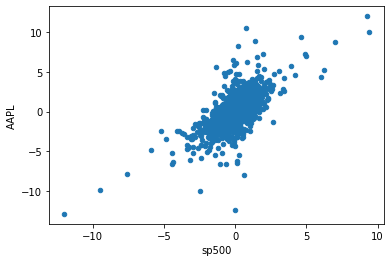

In [18]:
%matplotlib inline

# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind='scatter', x='sp500', y='AAPL');

In [19]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!
def get_beta_and_alpha(df, stock_to_compare, market='sp500', verbose=True):
  beta, alpha = np.polyfit(df[market], df[stock_to_compare], deg=1)
  if verbose:
    print(f'Beta for {stock_to_compare} stock is {beta} and alpha is {alpha}')
  return beta, alpha

stock_to_compare = 'AAPL'
_ = get_beta_and_alpha(stocks_daily_return, stock_to_compare)

Beta for AAPL stock is 1.1128924148678097 and alpha is 0.05281208469440288


In [20]:
def market_comparisson(df, stock_to_compare, market='sp500', ax=None, verbose=True):
  beta, alpha = get_beta_and_alpha(df, stock_to_compare, market, verbose)
  
  # Now let's plot the scatter plot and the straight line on one plot
  ax = df.plot(kind='scatter', x='sp500', y=stock_to_compare, ax=ax);

  # Straight line equation with alpha and beta parameters 
  # Straight line equation is y = beta * rm + alpha
  ax.plot(df.sp500, df.sp500*beta + alpha, ls='-', color='r', lw=0.5)
  ax.set_title(f'{stock_to_compare} market comparisson')

  return beta, alpha

Beta for AAPL stock is 1.1128924148678097 and alpha is 0.05281208469440288


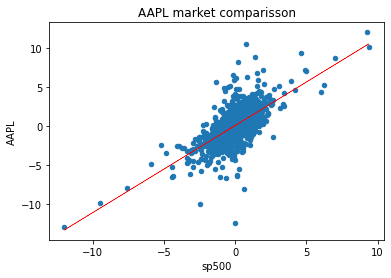

In [21]:
%matplotlib inline

stock_to_compare = 'AAPL'
_ = market_comparisson(stocks_daily_return, stock_to_compare)

**MINI CHALLENGE #3:**
- **Using Yahoo Finance or any other site, verify whether the obtained Beta for AAPL makes sense or not**
- **Calculate Beta for Tesla Inc. and compare it with published Yahoo Finance values**

In [22]:
# Using Yahoo Finance or any other site, verify whether the obtained Beta for AAPL makes sense or not
# https://finance.yahoo.com/trending-tickers

Beta for TSLA stock is 1.2686150101095908 and alpha is 0.17583492165165843


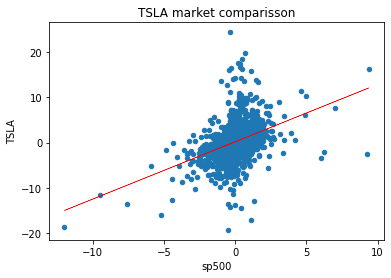

In [23]:
%matplotlib inline

# Calculate Beta for Tesla Inc. and compare it with published Yahoo Finance values
stock_to_compare = 'TSLA'
_ = market_comparisson(stocks_daily_return, stock_to_compare)

# TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [27]:
def get_capm(df, stock_to_compare, market='sp500', rf=0, verbose=2):
  """
  To calculate the camp in an individual stock.
  input:
    df:               Dataframe, Data containing the stock and market prices.
    stock_to_compare: String, name of the column that contain the stock prices.
    market:           String, name of the column that contain the market prices.
    rf:               Float, Risk Free rate.
    verbose:          0 no log at all, 1 capm log, 2 full log
  """
  # Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
  beta, alpha = get_beta_and_alpha(df, stock_to_compare, market, verbose=(verbose==2))

  # Let's calculate the average daily rate of return for S&P500
  average_return = stocks_daily_return.sp500.mean()
  if verbose==2:
    print(f'Average return for {stock_to_compare} stock is {average_return}')

  # Let's calculate the annualized rate of return for S&P500 
  # Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
  # Check your answers with: https://dqydj.com/sp-500-return-calculator/
  rm = stocks_daily_return.sp500.mean() * 252
  if verbose==2:
    print(f'Anualized {stock_to_compare} return is {rm}')

  # Calculate return for any security (APPL) using CAPM  
  ER = rf + (beta * (rm-rf))
  if verbose>0:
    print(f'Expected Return Based on CAPM (Capital Asset Pricing Model) of {stock_to_compare} stock is {ER}')

  return beta, alpha, average_return, rm, ER

In [28]:
# Select any stock, let's say Apple 
stock_to_compare = 'AAPL'

# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM  
beta, alpha, average_return, rm, ER = get_capm(stocks_daily_return, stock_to_compare)

Beta for AAPL stock is 1.1128924148678097 and alpha is 0.05281208469440288
Average return for AAPL stock is 0.04931600660038915
Anualized AAPL return is 12.427633663298066
Expected Return Based on CAPM (Capital Asset Pricing Model) of AAPL stock is 13.830619238640267


**MINI CHALLENGE #4:**
- **Apply CAPM formula to calculate the return for AT&T**  

In [29]:
# Select any stock, let's say Apple 
stock_to_compare = 'T'

# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM  
beta, alpha, average_return, rm, ER = get_capm(stocks_daily_return, stock_to_compare)

Beta for T stock is 0.7446293454747845 and alpha is -0.028563430198461512
Average return for T stock is 0.04931600660038915
Anualized T return is 12.427633663298066
Expected Return Based on CAPM (Capital Asset Pricing Model) of T stock is 9.253980720502037


# TASK #6: CALCULATE BETA FOR ALL STOCKS

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')


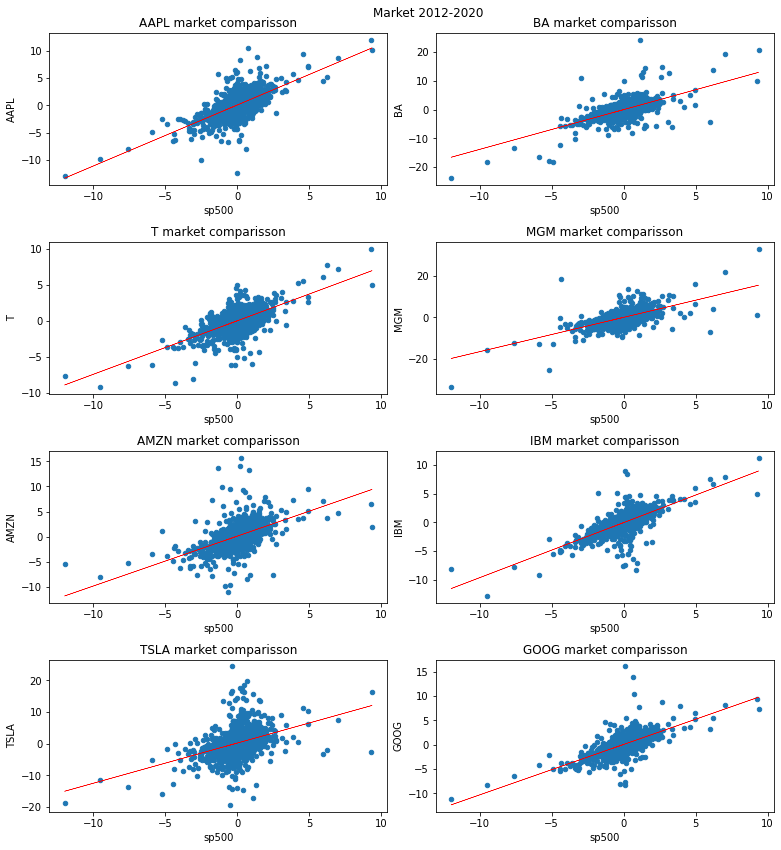

In [30]:
%matplotlib inline

# Portfolio
print(stocks_daily_return.columns)

# Initiate the dictionaries
beta_dict, alpha_dict = {}, {}

# Let's create a placeholder for all betas and alphas (empty dictionaries)
fig, axs = plt.subplots(nrows=int(len(stocks_daily_return.columns)/2), ncols=2, figsize = (12, 12))

for i, stock_to_compare in enumerate(stocks_daily_return.columns[:-1]):
  ax = axs.flatten()[i]
  beta, alpha = market_comparisson(stocks_daily_return, stock_to_compare, ax=ax, verbose=False)
  beta_dict[stock_to_compare], alpha_dict[stock_to_compare] = beta, alpha

fig.suptitle('Market 2012-2020')
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=.9, top=.95, wspace=None, hspace=None);

In [31]:
# Let's view Beta for every stock 
beta_dict

{'AAPL': 1.1128924148678097,
 'BA': 1.3828672010892786,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180114,
 'AMZN': 0.9917345712576845,
 'IBM': 0.960414914809525,
 'TSLA': 1.2686150101095908,
 'GOOG': 1.0348817687428562}

In [32]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 0.17%.
alpha_dict

{'AAPL': 0.05281208469440288,
 'BA': -0.002290698329752977,
 'T': -0.028563430198461512,
 'MGM': -0.016885305520478545,
 'AMZN': 0.10221396417765283,
 'IBM': -0.05345494150445112,
 'TSLA': 0.17583492165165843,
 'GOOG': 0.03335558721467021}

**MINI CHALLENGE #5:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [33]:
# Help https://plotly.com/python/subplots/
from plotly.subplots import make_subplots
import plotly.graph_objects as go

axs = [(i+1,j+1) for i in range(4) for j in range(2)]
fig = make_subplots(rows=4, cols=2,
                    subplot_titles=stocks_daily_return.columns[:-1])

for i, stock_to_compare in enumerate(stocks_daily_return.columns[:-1]):
  fig.add_trace(go.Scatter(x=stocks_daily_return.sp500, y=stocks_daily_return[stock_to_compare], mode='markers'), 
                row=axs[i][0], col=axs[i][1])
  fig.add_trace(go.Scatter(x=stocks_daily_return.sp500, y=stocks_daily_return.sp500*beta_dict[stock_to_compare] + alpha_dict[stock_to_compare],
                           line={'color':'black', 'width':0.5}),
                row=axs[i][0], col=axs[i][1])
  
  
fig.update_layout(height=800, width=1000, title_text="Marker & Stock Comparisson", showlegend=False)
fig.show()

# TASK #7: APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [34]:
# Obtain a list of all stock names
stocks_daily_return.columns[:-1]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG'], dtype='object')

In [35]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Define the expected return dictionary
ER_dict = {}

for stock_to_compare in stocks_daily_return.columns[:-1]:
  # Calculate return for any security (APPL) using CAPM  
  beta, alpha, average_return, rm, ER = get_capm(stocks_daily_return, stock_to_compare, verbose=1)
  ER_dict[stock_to_compare] = ER

Expected Return Based on CAPM (Capital Asset Pricing Model) of AAPL stock is 13.830619238640267
Expected Return Based on CAPM (Capital Asset Pricing Model) of BA stock is 17.185766980127894
Expected Return Based on CAPM (Capital Asset Pricing Model) of T stock is 9.253980720502037
Expected Return Based on CAPM (Capital Asset Pricing Model) of MGM stock is 20.549933694065814
Expected Return Based on CAPM (Capital Asset Pricing Model) of AMZN stock is 12.324913942818474
Expected Return Based on CAPM (Capital Asset Pricing Model) of IBM stock is 11.935684726020396
Expected Return Based on CAPM (Capital Asset Pricing Model) of TSLA stock is 15.765882605403165
Expected Return Based on CAPM (Capital Asset Pricing Model) of GOOG stock is 12.861131506762163


In [36]:
# Let's view ER for every stock 
ER_dict

{'AAPL': 13.830619238640267,
 'BA': 17.185766980127894,
 'T': 9.253980720502037,
 'MGM': 20.549933694065814,
 'AMZN': 12.324913942818474,
 'IBM': 11.935684726020396,
 'TSLA': 15.765882605403165,
 'GOOG': 12.861131506762163}

In [37]:
ER_dict.values()

dict_values([13.830619238640267, 17.185766980127894, 9.253980720502037, 20.549933694065814, 12.324913942818474, 11.935684726020396, 15.765882605403165, 12.861131506762163])

In [38]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [39]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER_dict.values()) * portfolio_weights)
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.213489176792526%



**MINI CHALLENGE #6:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


In [40]:
portfolio_weights = 1/2 * np.ones(2) 
ER_portfolio = sum([ER_dict['AAPL'], ER_dict['AMZN']] * portfolio_weights)
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 13.077766590729372%



# **AWESOME JOB!**

# **MINI CHALLENGES SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data** 
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck** 

In [41]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()

In [42]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [43]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

**MINI CHALLENGE #2 SOLUTION:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [44]:
stocks_daily_return.mean()
# S&P500 average daily return is 0.049%
# Amazon average daily return is 0.15%
# Google average daily return is 0.084%

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

**MINI CHALLENGE #3 SOLUTION:**
- **Using Yahoo Finance or any other site, verify whether the obtained Beta for AAPL makes sense or not**
- **Calculate Beta for Tesla Inc. and compare it with published Yahoo Finance values**

In [45]:
# By Checking Yahoo Finance, Beta for AAPL for the last 5 years is 1.23
# Check this out: https://finance.yahoo.com/quote/AAPL/

1.2686150101095908


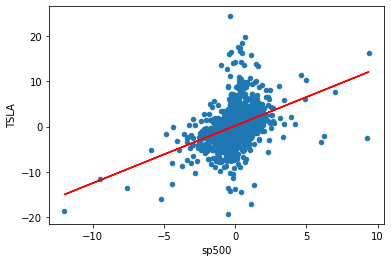

In [46]:
%matplotlib inline
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print(beta)  
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r');

In [47]:
# According to Yahoo Fianance, Tesla Beta (5 years) is = 1.30

**MINI CHALLENGE #4 SOLUTION:**
- **Apply CAPM formula to calculate the return for AT&T**  

In [48]:
# You have to calculate Beta for Amazon first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', beta, alpha)) 

Beta for T stock is = 0.7446293454747845 and alpha is = -0.028563430198461512


In [49]:
# Calculate return for AT&T using CAPM  
ER_T = rf + ( beta * (rm - rf) ) 
print(ER_T)

9.253980720502037


**MINI CHALLENGE #5 SOLUTION:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [50]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

**MINI CHALLENGE #6 SOLUTION:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


In [51]:
ER_dict['AMZN']

12.324913942818474

In [52]:
# Calculate the portfolio return 
ER_portfolio = 0.5 * ER_dict['AAPL'] +  0.5 * ER_dict['AMZN']
ER_portfolio

13.077766590729372